In [214]:
import json
import urllib
import urllib.parse
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [215]:
scopus_conferences = ["CEP", "UKICER", "Koli", "ITiCSE", "ICER"]

data_dir = "data"

In [216]:
def affil_institution(affil):
#    print ("affil_detail for ", affil)
    return affil['affilname']

In [217]:
def affil_is_uk(affil):
    if affil['affiliation-country'] == 'United Kingdom':
        return True
    else:
        print ("filtering out ", affil)

In [218]:
paper_dfs = []

paper_affiliation_dfs = []

for conference in scopus_conferences:
    with open(conference + "_papers.json") as conff:
        conf_paper_files=json.load(conff)
        for paper_fname in list(conf_paper_files):
            fname = urllib.parse.quote(paper_fname, safe='')
#            print ("opening ", fname)
            with open(os.path.join(data_dir, fname + ".json")) as paperf:
                paper = json.load(paperf)
                paper_dict = {}
                try:
                    paper_dict['conference'] = conference
                    date = paper['coredata']['prism:coverDate']
                    year = date[0:4]
                    paper_dict['year'] = [year]
                    paper_dict['title'] = [paper['coredata']['dc:title'].strip()]
                    paper_dict['doi'] = [paper['coredata']['prism:doi']]
                    paper_dict['scopus_url'] = [paper['coredata']['prism:url']]

                    title_hash = str(hash(str(paper_dict['title'][0])))
                    paper_dict['title_hash'] = [title_hash]
                    paper_dict['key'] = "_".join([conference,year , title_hash[-6:]])
                    paper_affils = paper['affiliation']
                    
                    if not (isinstance(paper_affils, list)):
                        paper_affils = [paper_affils]
                    
                    paper_uk_affils = filter(affil_is_uk, paper_affils)
                    
                    paper_uk_institutions = list(map(affil_institution, paper_uk_affils))

                    paper_affiliation_df = pd.DataFrame({"institution": paper_uk_institutions})
                    paper_affiliation_df['paper'] = paper_dict['key']
                    paper_affiliation_df['weight'] = 1 / len(paper_affils)
                    paper_affiliation_df['conference'] = conference
                    paper_affiliation_df['doi'] = paper_dict['doi'][0]

#                    paper_dict['abstract'] = [paper['coredata']['dc:description']]

                except KeyError as e:
                    print("KeyError ", e, " in ",fname)
            
                paper_df = pd.DataFrame(paper_dict)
                paper_dfs.append(paper_df)
                paper_affiliation_dfs.append(paper_affiliation_df)


filtering out  {'affiliation-city': 'Hamilton', 'affilname': 'Colgate University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Lincoln', 'affilname': 'University of Nebraska–Lincoln', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Mianwali', 'affilname': 'Namal University', 'affiliation-country': 'Pakistan'}
filtering out  {'affiliation-city': 'Dublin', 'affilname': 'University College Dublin', 'affiliation-country': 'Ireland'}
filtering out  {'affiliation-city': 'High Point', 'affilname': 'High Point University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Maynooth', 'affilname': 'Maynooth University', 'affiliation-country': 'Ireland'}
filtering out  {'affiliation-city': 'St Leo', 'affilname': 'Saint Leo University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Walla Walla', 'affilname': 'Whitman College', 'affiliation-country': 'United States'}
KeyError  'pr

filtering out  {'affiliation-city': 'Accra', 'affilname': 'Ashesi University', 'affiliation-country': 'Ghana'}
filtering out  {'affiliation-city': 'Karu', 'affilname': 'Bingham University', 'affiliation-country': 'Nigeria'}
filtering out  {'affiliation-city': 'Kuopio', 'affilname': 'Itä-Suomen yliopisto', 'affiliation-country': 'Finland'}
filtering out  {'affiliation-city': 'Blacksburg', 'affilname': 'Virginia Polytechnic Institute and State University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Ann Arbor', 'affilname': 'University of Michigan, Ann Arbor', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Pretoria', 'affilname': 'University of Pretoria', 'affiliation-country': 'South Africa'}
filtering out  {'affiliation-city': 'Gaborone', 'affilname': 'University of Botswana', 'affiliation-country': 'Botswana'}
filtering out  {'affiliation-city': 'San Jose', 'affilname': 'San Jose State University', 'affiliation-country': '

filtering out  {'affiliation-city': 'Accra', 'affilname': 'Ashesi University', 'affiliation-country': 'Ghana'}
filtering out  {'affiliation-city': 'Karu', 'affilname': 'Bingham University', 'affiliation-country': 'Nigeria'}
filtering out  {'affiliation-city': 'Kuopio', 'affilname': 'Itä-Suomen yliopisto', 'affiliation-country': 'Finland'}
filtering out  {'affiliation-city': 'Blacksburg', 'affilname': 'Virginia Polytechnic Institute and State University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Ann Arbor', 'affilname': 'University of Michigan, Ann Arbor', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Pretoria', 'affilname': 'University of Pretoria', 'affiliation-country': 'South Africa'}
filtering out  {'affiliation-city': 'Gaborone', 'affilname': 'University of Botswana', 'affiliation-country': 'Botswana'}
filtering out  {'affiliation-city': 'Vancouver', 'affilname': 'The University of British Columbia', 'affiliation-c

filtering out  {'affiliation-city': 'Buffalo', 'affilname': 'University at Buffalo, The State University of New York', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'La Jolla', 'affilname': 'University of California, San Diego', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Durham', 'affilname': 'University System of New Hampshire', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Amherst', 'affilname': 'University of Massachusetts Amherst', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Uppsala', 'affilname': 'Uppsala Universitet', 'affiliation-country': 'Sweden'}
filtering out  {'affiliation-city': 'Helsinki', 'affilname': 'Helsingin Yliopisto', 'affiliation-country': 'Finland'}
filtering out  {'affiliation-city': 'Stockholm', 'affilname': 'The Royal Institute of Technology (KTH)', 'affiliation-country': 'Sweden'}
filtering out  {'affiliation-city': 'Lille', 'affilna

filtering out  {'affiliation-city': 'High Point', 'affilname': 'High Point University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Hempstead', 'affilname': 'Hofstra University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Durham', 'affilname': 'University System of New Hampshire', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Queens', 'affilname': "St. John's University", 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Leiden', 'affilname': 'Universiteit Leiden', 'affiliation-country': 'Netherlands'}
filtering out  {'affiliation-city': 'Giessen', 'affilname': 'Justus-Liebig-Universität Gießen', 'affiliation-country': 'Germany'}
filtering out  {'affiliation-city': 'Charleston', 'affilname': 'College of Charleston', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Uppsala', 'affilname': 'Uppsala Universitet', 'affiliation-country': 'Sw

filtering out  {'affiliation-city': 'Skopje', 'affilname': 'Ss. Cyril and Methodius University in Skopje', 'affiliation-country': 'North Macedonia'}
filtering out  {'affiliation-city': 'Melbourne', 'affilname': 'Monash University', 'affiliation-country': 'Australia'}
filtering out  {'affiliation-city': 'Amherst', 'affilname': 'University of Massachusetts Amherst', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Callaghan', 'affilname': 'The University of Newcastle, Australia', 'affiliation-country': 'Australia'}
filtering out  {'affiliation-city': 'Philadelphia', 'affilname': 'University of Pennsylvania', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Auckland', 'affilname': 'The University of Auckland', 'affiliation-country': 'New Zealand'}
filtering out  {'affiliation-city': 'Helsinki', 'affilname': 'Helsingin Yliopisto', 'affiliation-country': 'Finland'}
filtering out  {'affiliation-city': 'Espoo', 'affilname': 'Aalto Univer

filtering out  {'affiliation-city': 'Westminster', 'affilname': 'Front Range Community College', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Athens', 'affilname': 'University of Georgia', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Chapel Hill', 'affilname': 'The University of North Carolina at Chapel Hill', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Houghton', 'affilname': 'Michigan Technological University', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Rochester', 'affilname': 'Rochester Institute of Technology', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Umea', 'affilname': 'Umeå Universitet', 'affiliation-country': 'Sweden'}
filtering out  {'affiliation-city': 'Storrs', 'affilname': 'University of Connecticut', 'affiliation-country': 'United States'}
filtering out  {'affiliation-city': 'Bothell', 'affilname': 'Universi

In [219]:
papers_df = pd.concat(paper_dfs)
papers_df.set_index('key', inplace=True)
papers_df

,conference,year,title,doi,scopus_url,title_hash
key,,,,,,
CEP_2025_671693,CEP,2025,Enhancing conceptual understanding in early ye...,10.1145/3702212.3702220,https://api.elsevier.com/content/abstract/scop...,-7612675003404671693
CEP_2025_425228,CEP,2025,Assessing Software Engineering Students' Analy...,10.1145/3702212.3702223,https://api.elsevier.com/content/abstract/scop...,6668210468012425228
CEP_2025_456639,CEP,2025,Themes in the Declared Use of Generative Artif...,10.1145/3702212.3702217,https://api.elsevier.com/content/abstract/scop...,-6489872609726456639
CEP_2025_892833,CEP,2025,Learning Programming Languages by Pantomime,10.1145/3702212.3702213,https://api.elsevier.com/content/abstract/scop...,5183681864324892833
CEP_2025_871360,CEP,2025,FLARE: A Framework Supporting Code Comprehensi...,10.1145/3702212.3702219,https://api.elsevier.com/content/abstract/scop...,-6801671759654871360
...,...,...,...,...,...,...
ICER_2019_159290,ICER,2019,Towards a model of conceptual transfer for stu...,10.1145/3291279.3339437,https://api.elsevier.com/content/abstract/scop...,1279848945878159290
ICER_2019_738027,ICER,2019,K-6 introductory programming: Why early years ...,10.1145/3291279.3339442,https://api.elsevier.com/content/abstract/scop...,4244454290770738027
ICER_2019_688319,ICER,2019,Designing for integrated K-5 computing and lit...,10.1145/3291279.3339425,https://api.elsevier.com/content/abstract/scop...,-7288890283844688319


In [220]:
affiliations_df = pd.concat(paper_affiliation_dfs)
affiliations_df

,institution,paper,weight,conference,doi
0,University of Glasgow,CEP_2025_671693,1.0,CEP,10.1145/3702212.3702220
0,The Open University,CEP_2025_425228,0.5,CEP,10.1145/3702212.3702223
1,Swansea University,CEP_2025_425228,0.5,CEP,10.1145/3702212.3702223
0,University of Strathclyde,CEP_2025_456639,0.5,CEP,10.1145/3702212.3702217
1,University of Glasgow,CEP_2025_456639,0.5,CEP,10.1145/3702212.3702217
...,...,...,...,...,...
0,University of Glasgow,ICER_2019_159290,1.0,ICER,10.1145/3291279.3339437
0,University of Glasgow,ICER_2019_738027,1.0,ICER,10.1145/3291279.3339442
0,"University of Nottingham, Faculty of Social Sc...",ICER_2019_688319,1.0,ICER,10.1145/3291279.3339425
0,University of Glasgow,ICER_2019_189907,1.0,ICER,10.1145/3291279.3341205


In [221]:
institutions_df = pd.read_excel("institutions.xlsx", dtype=str)
#institutions_df

In [222]:
affiliations_domain = pd.merge(affiliations_df, institutions_df, how="left", left_on='institution', right_on='name')

In [223]:
def fix_affiliation (row):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    if row['doi'] == "10.1145/3631802.3631803":
        print ("empty ")
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row['institution']:
            return inst_row['domain']
    if row['doi'] == "10.1145/3631802.3631803":
        return "cam"
    if row['doi'] == "10.1145/3649217.3653622":
        return "warwick"
    if row['doi'] == "10.1145/3587103.3594143":
        return "citystgeorges"
    if row['doi'] == "10.1145/3304221.3325580":
        return "warwick"
    if row['doi'] == "10.1145/3501385.3543960":
        return "cam"
    
affiliations_domain['domain'] = affiliations_domain.apply(fix_affiliation, axis=1)

empty 


In [224]:
affiliations_domain[affiliations_domain.domain.isnull()]

,institution,paper,weight,conference,doi,domain,name
156,IBM United Kingdom Limited,UKICER_2023_740134,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
160,ForgeRock,UKICER_2023_740134,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
225,Barefoot Computing,UKICER_2019_180751,0.333333,UKICER,10.1145/3351287.3351291,None,NaN
380,Independent,ITiCSE_2022_147508,0.250000,ITiCSE,10.1145/3502717.3532119,None,NaN
497,James Fisher Digital,ITiCSE_2019_144621,0.500000,ITiCSE,10.1145/3304221.3325559,None,NaN


In [226]:
affiliations_grouped = affiliations_domain.groupby(["conference", "domain"])["weight"].sum().reset_index()

In [238]:
affiliations_grouped[affiliations_grouped['conference']=="ITiCSE"].sort_values("weight")

,conference,domain,weight
78,ITiCSE,nottingham,0.100000
54,ITiCSE,city,0.100000
94,ITiCSE,yorksj,0.125000
46,ITiCSE,aber,0.166667
68,ITiCSE,kent,0.166667
90,ITiCSE,sussex,0.166667
47,ITiCSE,abertay,0.200000
87,ITiCSE,southwales,0.200000
81,ITiCSE,port,0.222222
50,ITiCSE,brookes,0.319780


/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


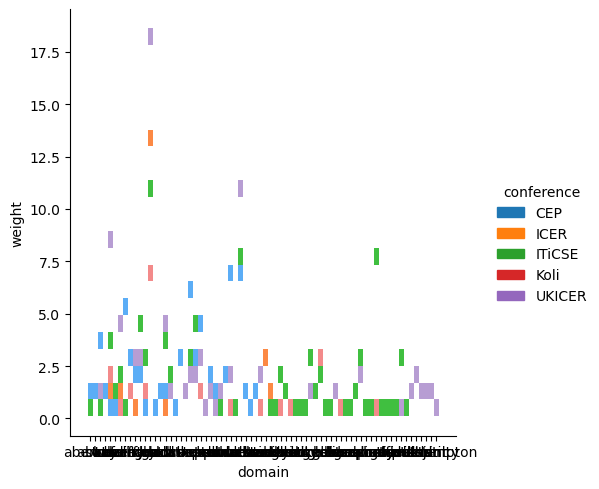

In [228]:
sns.displot(affiliations_grouped, x="domain", y ="weight", hue='conference')


In [121]:
with open("2018_CEP_papers.json") as CEP_2018f:
    CEP_2018_papers=json.load(CEP_2018f)
    
CEP_2018_papers[3].keys()

dict_keys(['time', 'authors', 'title', 'abstract'])

In [122]:
for CEP_2018_paper in CEP_2018_papers:
    paper_dict = {}
    paper_dict['title'] = [CEP_2018_paper['title'].strip()]
    print ("adding ", paper_dict['title'])
    paper_dict['abstract'] = [CEP_2018_paper['abstract']]
    paper_dict['date'] = ['2018-01-11']
    paper_df = pd.DataFrame(paper_dict)
    paper_dfs.append(paper_df)

    
CEP_2018_papers

adding  ['Intelligent Agents for Education']
adding  ['Sustainable Computing: a home for LSEP, Commercial practice and Research skills']
adding  ['Including IT service management in the Computing curriculum: a caricature approach.']
adding  ['"It\'s only a computing project - so there can\'t be any ethical issues..."']
adding  ['No money worries: new student identities for Graduate Level Apprentices']
adding  ['The enemies within - inhibitors to learning']
adding  ['Blocks-based programming for introductory programming in Python']
adding  ['Enhancing computer programming skills through Virtual Reality']
adding  ['Supporting the learning of programming with the PRIMM approach']
adding  ['Self regulated Learning in Engineering and Computing Classrooms']
adding  ['Learner engagement in larger computer science classes']
adding  ["Promoting learning by going against students' preference to learning"]
adding  ['The Associate Student Project celebrates five years of student transitions from f

[{'time': '',
  'authors': [{'firstName': 'Karen',
    'lastName': 'Hunsdale',
    'email': '',
    'department': '',
    'institution': 'University of Winchester\t'}],
  'title': 'Intelligent Agents for Education',
  'abstract': "The use of CAs can be applied to educational settings to better support teaching and learning and alternative learning environments. Computing underpins almost all areas of the modern world and many new opportunities in science and engineering could not have been realized without it. Thus, computer scientists have the potential to revolutionize societies, develop economic wealth and change people’s lives. Employers needs to ensure that its future generations have the skills that employers require, which is only achieved through effective teaching and learning practices at our schools. If we do not engage at this level, we are unlikely to produce the number of computer scientists required to satisfy the demands of industry. Teachers need support from the scien

In [129]:
papers_df = pd.concat(paper_dfs, ignore_index=True)

In [46]:
len(papers_df)

352

In [47]:
papers_df.to_csv("papers.csv")